### 1. Create a data folder in your local project repository.



### 2. Download these two CSV files and place them in the data folder:

> a. Gross Domestic Product (GDP) per capita http://data.un.org/Data.aspx?d=WDI&f=Indicator_Code%3aNY.GDP.PCAP.PP.KD DO NOT APPLY ANY FILTERS
>
>    rename the file to gdp_percapita.csv
>    open it with a text editor (not excel) and take a look at the top and bottom, do you notice anything?

*4 columns with headers. Values for each country across multiple years. Long trailing decimal on the Value. Value Footnotes column appears mostly blank.*

> b. Percentage of Individuals using the Internet http://data.un.org/Data.aspx?d=ITU&f=ind1Code%3aI99H DO NOT APPLY ANY FILTERS
>
>    rename the file to internet_use.csv
    open it with a text editor (not excel) and take a look at the top and bottom, do you notice anything?

*Footnotes explanations at the bottom which don't fit into the main table schema. This table is otherwise similar to the previous one, but the decimals for Value are neater and the Value Footnotes contains data.*


### 3. Create a notebooks folder and launch a Jupyter Notebook in this folder. Give it a meaningful name.
>
>   IMPORTANT: You are likely to get errors along the way. When you do, read the errors to try to understand what is happening and how to correct it.
>
>   Use markdown cells to record your answers to any questions asked in this exercise. On the menu bar, you can toggle the cell type from Code to Markdown.
>
>   Import the required packages with their customary aliases as follows:


In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 4. Using the pandas read_csv() method, read the GDP dataset into your notebook as a DataFrame called gdp_df. Take a look at the first few and last few rows to familiarize yourself with what is contained in this dataset.

In [45]:
gdp_df = pd.read_csv('../data/gdp_percapita.csv')

In [46]:
gdp_df.head()

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2023,1992.424394,NaN
1,Afghanistan,2022,1981.710168,NaN
2,Afghanistan,2021,2144.166570,NaN
3,Afghanistan,2020,2769.685745,NaN
4,Afghanistan,2019,2927.245144,NaN


### 5. How many rows and columns are in gdp_df? What are the data types of each column?

*8219 rows, 4 columns*

*Datatypes: Country or Area = object, Year = int64, Value = float64, Value Footnotes = float64*

In [47]:
gdp_df.shape

(8219, 4)

In [48]:
gdp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8219 entries, 0 to 8218
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country or Area  8219 non-null   object 
 1   Year             8219 non-null   int64  
 2   Value            8219 non-null   float64
 3   Value Footnotes  0 non-null      float64
dtypes: float64(2), int64(1), object(1)
memory usage: 257.0+ KB


### 6. Drop the Value Footnotes column and rename the remaining three to 'Country', 'Year', and 'GDP_Per_Capita'.

In [49]:
gdp_df = gdp_df.drop(columns = ['Value Footnotes'])

In [50]:
gdp_df.columns = ['Country', 'Year', 'GDP_Per_Capita']

In [51]:
gdp_df.head()

,Country,Year,GDP_Per_Capita
0,Afghanistan,2023,1992.424394
1,Afghanistan,2022,1981.710168
2,Afghanistan,2021,2144.166570
3,Afghanistan,2020,2769.685745
4,Afghanistan,2019,2927.245144


### 7. How many countries have data for all years? Which countries are missing many years of data? Look at the number of observations per year. What do you notice?

*228 countries (or areas) with data for all years*

*Countries with 24/34 years or less: Virgin Islands, Cayman Islands, Faroe Islands, Kosovo, Sint Maarten (Dutch part), Turks and Caicos Islands, Djibouti*

*Observations/Countries included each year increase over time until 2015 after which the count remains stable.*

In [52]:
gdp_country_years = gdp_df.Country.value_counts()
gdp_country_years = gdp_country_years.to_frame()
gdp_country_years = gdp_country_years.reset_index()
gdp_country_years.Country.loc[gdp_country_years['count'] == 34]

0      Africa Eastern and Southern
1       Africa Western and Central
2                          Albania
3                          Andorra
4                          Algeria
                  ...             
223                   Turkmenistan
224                    Timor-Leste
225                           Togo
226            Trinidad and Tobago
227                        Tunisia
Name: Country, Length: 228, dtype: object

In [53]:
gdp_country_years.Country.loc[gdp_country_years['count'] < 24]

240               Virgin Islands
241               Cayman Islands
242                Faroe Islands
243                       Kosovo
244    Sint Maarten (Dutch part)
245     Turks and Caicos Islands
246                     Djibouti
Name: Country, dtype: object

In [54]:
gdp_df.Year.value_counts()

Year
2020    247
2021    247
2013    247
2016    247
2019    247
2018    247
2017    247
2014    247
2015    247
2022    246
2011    246
2012    246
2009    245
2010    245
2008    244
2007    242
2006    242
2005    241
2003    241
2004    241
2002    241
2023    240
2001    240
2000    240
1999    238
1998    238
1997    238
1996    236
1995    236
1994    235
1993    234
1992    234
1991    234
1990    233
Name: count, dtype: int64

### 8. In this question, you're going to create some plots to show the distribution of GDP per capita for the year 2020. Go to the Python Graph Gallery (https://www.python-graph-gallery.com/) and look at the different types of plots under the Distribution section. Create a histogram, a density plot, a boxplot, and a violin plot. What do you notice when you look at these plots? How do the plots compare and what information can you get out of one type that you can't necessarily get out of the others?

*Histogram and density show a similar pattern, and the violin plot shows a similar pattern vertically. The boxplot contains the most information including outliers and midpoints on top of the density and range shown in the other plots.*

(array([5.240e+03, 1.276e+03, 8.960e+02, 5.140e+02, 1.290e+02, 8.100e+01,
        4.400e+01, 3.200e+01, 4.000e+00, 3.000e+00]),
 array([   510.82282293,  17893.64827313,  35276.47372334,  52659.29917354,
         70042.12462374,  87424.95007395, 104807.77552415, 122190.60097435,
        139573.42642456, 156956.25187476, 174339.07732497]),
 <BarContainer object of 10 artists>)

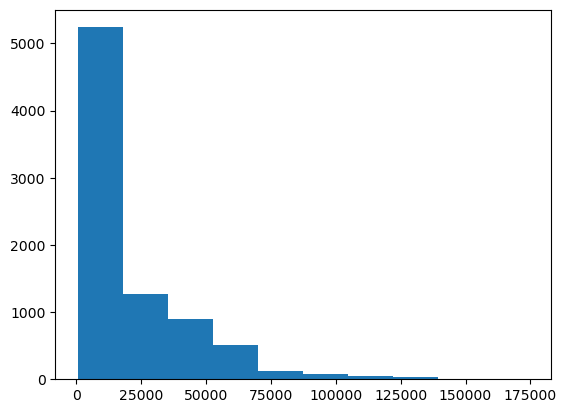

In [55]:
plt.hist(gdp_df.GDP_Per_Capita)

<Axes: xlabel='GDP_Per_Capita', ylabel='Density'>

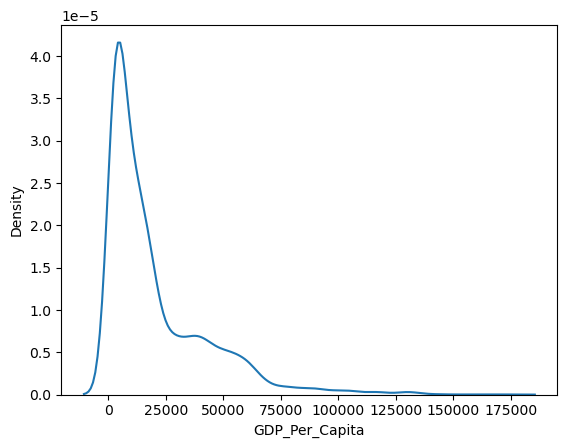

In [56]:
sns.kdeplot(gdp_df.GDP_Per_Capita)

<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

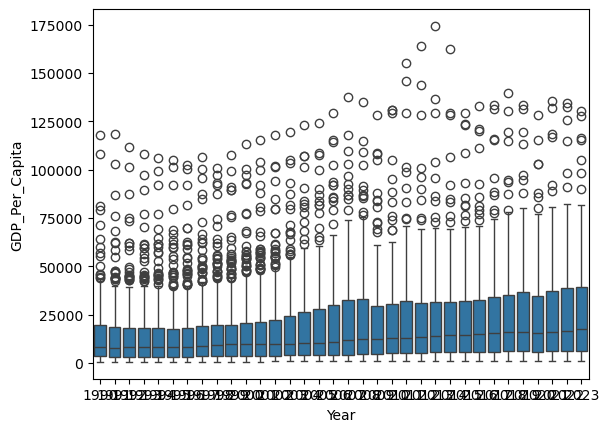

In [57]:
sns.boxplot(data = gdp_df, x='Year', y='GDP_Per_Capita')

{'bodies': [<matplotlib.collections.FillBetweenPolyCollection at 0x20bbad26990>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x20bbad26ad0>,
 'cmins': <matplotlib.collections.LineCollection at 0x20bbad26c10>,
 'cbars': <matplotlib.collections.LineCollection at 0x20bbad26d50>}

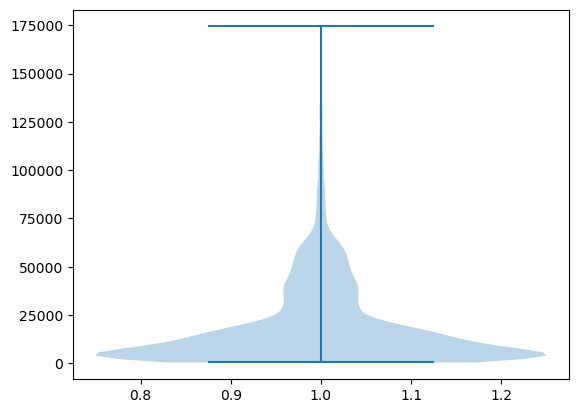

In [58]:
plt.violinplot(gdp_df.GDP_Per_Capita)

### 9. What was the median GDP per capita value in 2020?
*15309.23598817024*

In [59]:
gdp_2020 = gdp_df.GDP_Per_Capita.loc[gdp_df.Year == 2020]
gdp_2020.median()

15309.23598817024

### 10. For this question, you're going to create some visualizations to compare GDP per capita values for the years 1990, 2000, 2010, and 2020. Start by subsetting your data to just these 4 years into a new DataFrame named gdp_decades. Using this, create the following 4 plots:

>    A boxplot
>    A barplot (check out the Barplot with Seaborn section: https://www.python-graph-gallery.com/barplot/#Seaborn)
>    A scatterplot
>    A scatterplot with a trend line overlaid (see this regplot example: https://www.python-graph-gallery.com/42-custom-linear-regression-fit-seaborn)
>    Comment on what you observe has happened to GDP values over time and the relative strengths and weaknesses of each type of plot.

*GDP generally increases over time.*


In [60]:
decades = [1990, 2000, 2010, 2020]
gdp_decades = gdp_df.loc[gdp_df.Year.isin(decades)]
gdp_decades.head()

,Country,Year,GDP_Per_Capita
3,Afghanistan,2020,2769.685745
13,Afghanistan,2010,2848.586061
23,Afghanistan,2000,1617.826475
27,Africa Eastern and Southern,2020,3861.111238
37,Africa Eastern and Southern,2010,3863.836012


<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

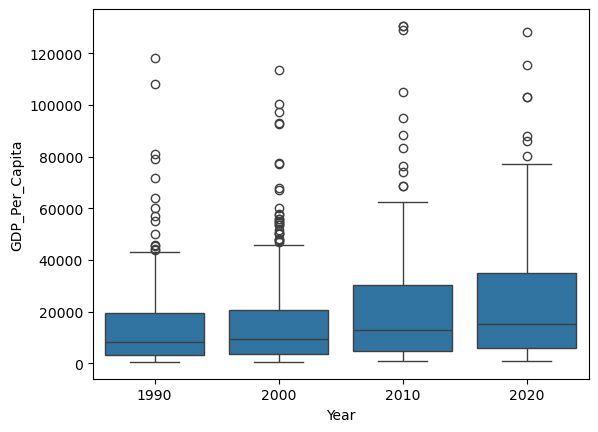

In [61]:
sns.boxplot(data = gdp_decades, x = 'Year', y = 'GDP_Per_Capita')

<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

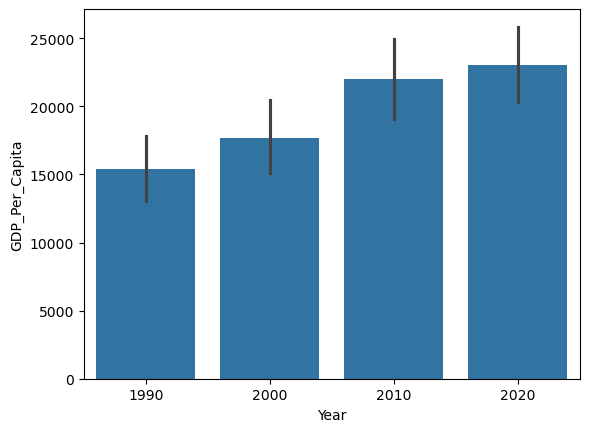

In [62]:
sns.barplot(x='Year', y='GDP_Per_Capita', data=gdp_decades)

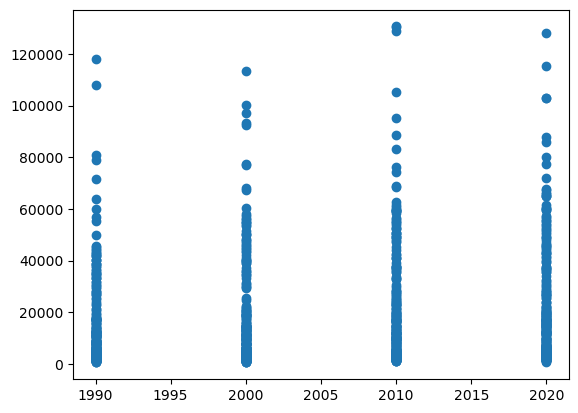

In [63]:
plt.scatter(gdp_decades.Year, gdp_decades.GDP_Per_Capita)

<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

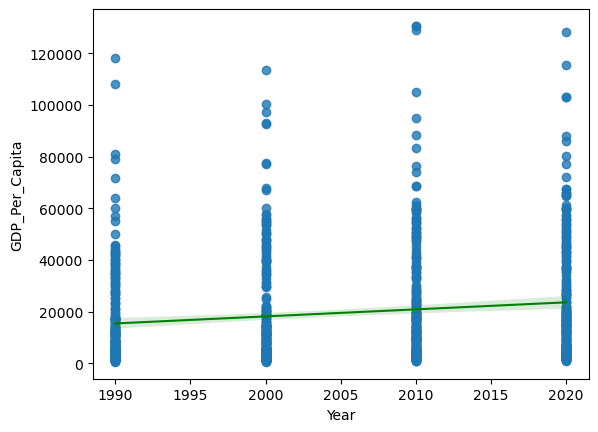

In [64]:
sns.regplot(
    x=gdp_decades.Year,
    y=gdp_decades.GDP_Per_Capita,
    line_kws={"color": "green", "linewidth": 1.5}
)

### 11. Which country was the first to have a GDP per capita greater than $100,000?

*Brunei and UAE*

In [65]:
high_gdp = gdp_df.loc[gdp_df.GDP_Per_Capita >= 100000]
first_high_gdp = high_gdp.loc[high_gdp.Year == high_gdp.Year.min()]
first_high_gdp

,Country,Year,GDP_Per_Capita
974,Brunei,1990,118163.683198
7827,United Arab Emirates,1990,108057.042464


### 12. Which country had the highest GDP per capita in 2020? Create a plot showing how this country's GDP per capita has changed over the timespan of the dataset.

*Luxembourg*

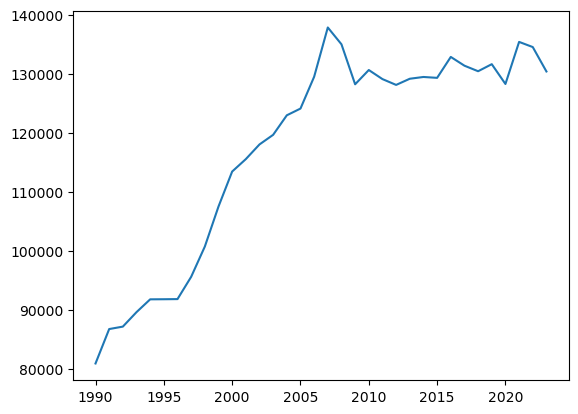

In [66]:
gdp_2020 = gdp_df.loc[gdp_df.Year == 2020]
max_gdp_2020 = gdp_2020.Country.loc[gdp_2020.GDP_Per_Capita == gdp_2020.GDP_Per_Capita.max()]
max_gdp_2020 = pd.Series.to_frame(max_gdp_2020)
max_gdp_2020_country = max_gdp_2020.iloc[0, 0]
plt.plot(gdp_df.Year.loc[gdp_df.Country == max_gdp_2020_country], gdp_df.GDP_Per_Capita.loc[gdp_df.Country == max_gdp_2020_country])

### 13. Which country had the lowest GDP per capita in 2020? Create a plot showing how this country's GDP per capita has changed over the timespan of the dataset. Bonus question: Is it true in general that coutries had a higher GDP per capita in 2020 than in 1990? Which countries had lower GDP per capita in 2020 than in 1990?

*Burundi*

*Yes, this is generally true.*

*Countries with lower GDP in 2020 vs 1990 were mostly in Africa, the Caribbean, Eastern Europe, and Western Asia. The countries include: Aruba, Barbados, Brunei, Burundi, Congo, DRC, Gabon, Haiti, Kyrgyz Republic, Liberia, Libya, Madagascar, Moldova, Nauru, Saudi Arabia, St. Lucia, Syrian Arab Republic, Tajikistan, The Bahamas, Ukraine, UAE, and Zimbabwe.*

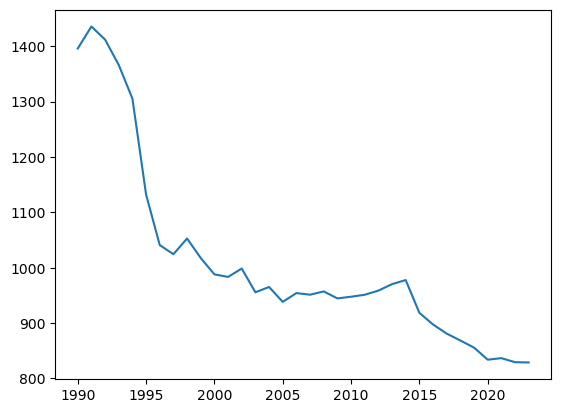

In [67]:
min_gdp_2020 = gdp_2020.Country.loc[gdp_2020.GDP_Per_Capita == gdp_2020.GDP_Per_Capita.min()]
min_gdp_2020 = pd.Series.to_frame(min_gdp_2020)
min_gdp_2020_country = min_gdp_2020.iloc[0, 0]
plt.plot(gdp_df.Year.loc[gdp_df.Country == min_gdp_2020_country], gdp_df.GDP_Per_Capita.loc[gdp_df.Country == min_gdp_2020_country])

In [68]:
gdp_2020 = gdp_df.loc[gdp_df.Year == 2020]
gdp_1990 = gdp_df.loc[gdp_df.Year == 1990]
gdp_compare = pd.merge(gdp_2020, gdp_1990, 
                               left_on = 'Country', right_on = 'Country', 
                               how = 'inner')

In [69]:
gdp_compare = gdp_compare.drop(columns = ['Year_x', 'Year_y'])

In [70]:
gdp_compare.columns = ['Country', 'GDP_2020', 'GDP_1990']

In [71]:
lower_gdp = gdp_compare.Country.loc[gdp_compare.GDP_2020 <  gdp_compare.GDP_1990]
lower_gdp

10                                        Aruba
16                                     Barbados
27                                       Brunei
30                                      Burundi
37                     Central African Republic
44                                        Congo
49                              Dem. Rep. Congo
71     Fragile and conflict affected situations
73                                        Gabon
84                                        Haiti
111                             Kyrgyz Republic
121                                     Liberia
122                                       Libya
129                                  Madagascar
144                                     Moldova
150                                       Nauru
182                                Saudi Arabia
197                                   St. Lucia
206                        Syrian Arab Republic
208                                  Tajikistan
211                                 The 

### 14. Read in the internet use dataset into a DataFrame named internet_df. You will likely get errors when doing this. Check the arguments for the read_csv function to find ones that can help correct the errors (https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html) Once you are able to read it in, take per a look at the top and bottom few rows to make sure that it has been read in correctly. Also, check the datatypes of the columns.

In [72]:
internet_df = pd.read_csv('../data/internet_use.csv', nrows=6084)
internet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6084 entries, 0 to 6083
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country or Area  6084 non-null   object 
 1   Year             6084 non-null   object 
 2   Value            6083 non-null   float64
 3   Value Footnotes  2826 non-null   object 
dtypes: float64(1), object(3)
memory usage: 190.3+ KB


### 15. Drop the Value Footnotes column and rename the remaining three to 'Country', 'Year', and 'Internet_Users_Pct'.

In [73]:
internet_df = internet_df.drop(columns = 'Value Footnotes')

In [74]:
internet_df.columns = ['Country', 'Year', 'Internet_Users_Pct']

### 16. Look at the number of observations in this dataset per year. What do you notice?

In [75]:
internet_df.Year.value_counts()

Year
1990        226
2007        217
2008        214
2002        214
2011        214
2009        214
2001        212
2005        212
2006        212
2000        210
2004        210
2012        209
2010        209
2003        208
1999        207
2016        206
2017        205
2014        204
2015        203
2013        203
1998        195
1997        188
2021        186
2020        186
2019        185
2022        184
1996        177
2018        174
1995        141
1994         92
1993         66
1992         50
1991         39
2023         11
Footnote      1
Name: count, dtype: int64

### 17. What is the first year to have a non-zero internet users percentage value?

*1990*

In [76]:
greater_than_zero = internet_df.Year.loc[internet_df.Internet_Users_Pct > 0]
greater_than_zero.sort_values()

1570    1990
2892    1990
306     1990
2034    1990
339     1990
        ... 
427     2023
677     2023
1656    2023
1537    2023
3057    2023
Name: Year, Length: 5803, dtype: object

### 18. How does the distribution of internet users percent differ for 2000 and 2014?

*Over time, there are many less reports of near zero percentages, and there are many reports of between 80-95% compared to a very infrequently reported high of around 55% in 2000.*

In [77]:
users_2000 = internet_df.Internet_Users_Pct.loc[internet_df.Year == '2000']
users_2014 = internet_df.Internet_Users_Pct.loc[internet_df.Year == '2014']

<Axes: >

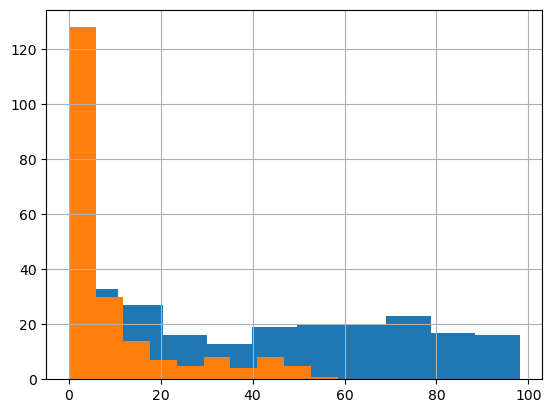

In [78]:
users_2014.hist() 
users_2000.hist()

### 19. For how many countries was the percentage of internet users below 5% in 2014?

*10*

In [79]:
below_5 = internet_df.Country.loc[(internet_df.Year == '2014') & (internet_df.Internet_Users_Pct < 5)]
below_5 = below_5.to_frame()

In [80]:
below_5.Country.count()

np.int64(10)

### 20. Merge the two DataFrames to one. Do this in a way that keeps all rows from each of the two DataFrames. Call the new DataFrame gdp_and_internet_use. Look at the first and last few rows to confirm that it merged correctly.

In [86]:
gdp_df['category'] = 'gdp'
internet_df['category'] = 'internet'

In [89]:
gdp_and_internet_use = pd.concat([gdp_df, internet_df])

In [90]:
gdp_and_internet_use

,Country,Year,GDP_Per_Capita,category,Internet_Users_Pct
0,Afghanistan,2023,1992.424394,gdp,NaN
1,Afghanistan,2022,1981.710168,gdp,NaN
2,Afghanistan,2021,2144.166570,gdp,NaN
3,Afghanistan,2020,2769.685745,gdp,NaN
4,Afghanistan,2019,2927.245144,gdp,NaN
...,...,...,...,...,...
6079,Zimbabwe,1996,NaN,internet,0.016790
6080,Zimbabwe,1995,NaN,internet,0.007684
6081,Zimbabwe,1994,NaN,internet,0.001739
6082,Zimbabwe,1990,NaN,internet,0.000000


### 21. Find the three countries with the highest internet users percentage in 2014. Use a seaborn FacetGrid (https://seaborn.pydata.org/generated/seaborn.FacetGrid.html) to compare how the GDP per capita has changed over time for these three countries. What do you notice?

In [113]:
top_users_2014 = gdp_and_internet_use.loc[(gdp_and_internet_use.Year == '2014') & (gdp_and_internet_use.category == 'internet')].sort_values(by = 'Internet_Users_Pct', ascending = False)

In [117]:
top_users_2014.head(3)

,Country,Year,GDP_Per_Capita,category,Internet_Users_Pct
2592,Iceland,2014,NaN,internet,98.158
1893,Falkland (Malvinas) Islands,2014,NaN,internet,97.600
602,Bermuda,2014,NaN,internet,96.800


In [129]:
top_internet_countries_2014 = [top_users_2014.iloc[0, 0], top_users_2014.iloc[1, 0], top_users_2014.iloc[2, 0]]

In [134]:
top_2014_internetters_gdp = gdp_and_internet_use.loc[gdp_and_internet_use.Country.isin(top_internet_countries_2014) + (gdp_and_internet_use.category == 'gdp')]

In [ ]:
graph = sns.FacetGrid(data = top_2014_internetters_gdp, col='GDP_Per_Capita', row='Year')
graph.map(plt.plot, 'Year', 'GDP_Per_Capita').add_legend()
plt.show()

### 22. Subset gdp_and_internet_use to just the year 2014. Save this as a new dataframe named gdp_and_internet_use_2014

### 23. Create a plot which compares Internet Users Percentage and GDP per Capita for the year 2014. What do you notice from this plot? If you see any unusual points, investigate them.

### 24. Stretch Question: Use the qcut function from pandas (https://pandas.pydata.org/docs/reference/api/pandas.qcut.html) to divide countries in gdp_per_capita_2014 into three groups based on their GDP per capita values. Label these groups as "Low", "Medium", and "High". Put these labels in a new column, named "GDP_group".

### 25. Stretch Question: How does the median internet users percentage compare for the three gdp groups?

### Bonus exercise: Download another data set from the UN data (http://data.un.org/Explorer.aspx) to merge with your data and explore.
